# Sequential Dense
---

## 00. Imports

In [1]:
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.activation.relu import ReluLayer
from src.activation.softmax import SoftmaxLayer
from src.layers.dense import DenseLayer
from src.model.sequential import SequentialModel
from src.utils.core import convert_categorical2one_hot
from src.optimizers.gradient_descent import GradientDescent
from src.optimizers.rms_prop import RMSProp
from src.optimizers.adam import Adam

## 01. Settings

In [4]:
# number of samples in the data set
N_SAMPLES = 2000
# number of classes
N_CLASSES = 6
# number of features
N_FEATURES = 2
# ratio between training and test sets
TEST_SIZE = 0.1

## 02. Supporting functions

In [5]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

## 03. Build data set

In [6]:
X, y = make_blobs(
    n_samples = N_SAMPLES,
    n_features = N_FEATURES,
    centers = N_CLASSES,
    cluster_std = 1.2,
    random_state=50
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
y_train = convert_categorical2one_hot(y_train)
y_test = convert_categorical2one_hot(y_test)

print(f"X shape: {X.shape}, y: {y.shape}")

X shape: (2000, 2), y: (2000,)


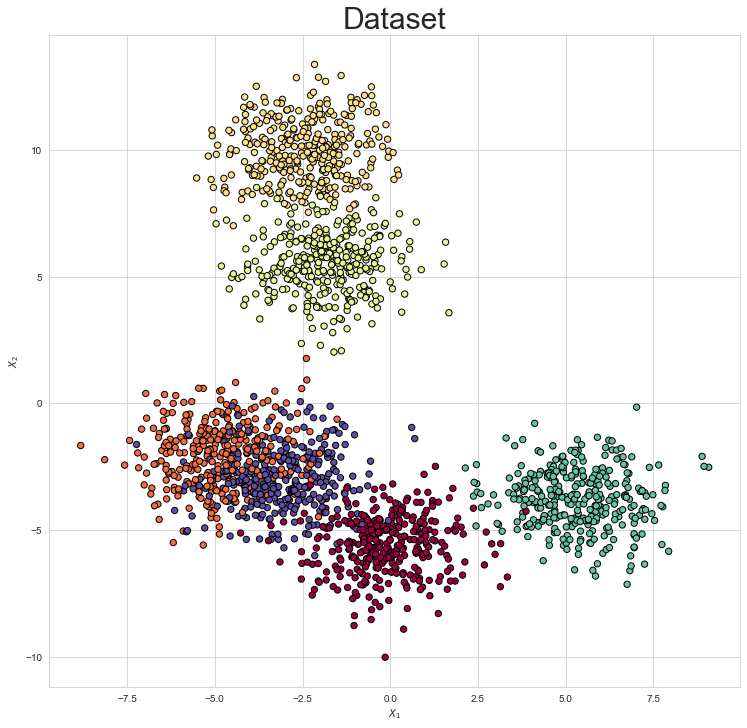

In [7]:
make_plot(X, y, "Dataset")

## 04. Build model

In [8]:
layers = [
    DenseLayer.initialize(units_prev=N_FEATURES, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=N_CLASSES),
    SoftmaxLayer()
]

optimizer = GradientDescent(lr=0.005)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [9]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=200
)

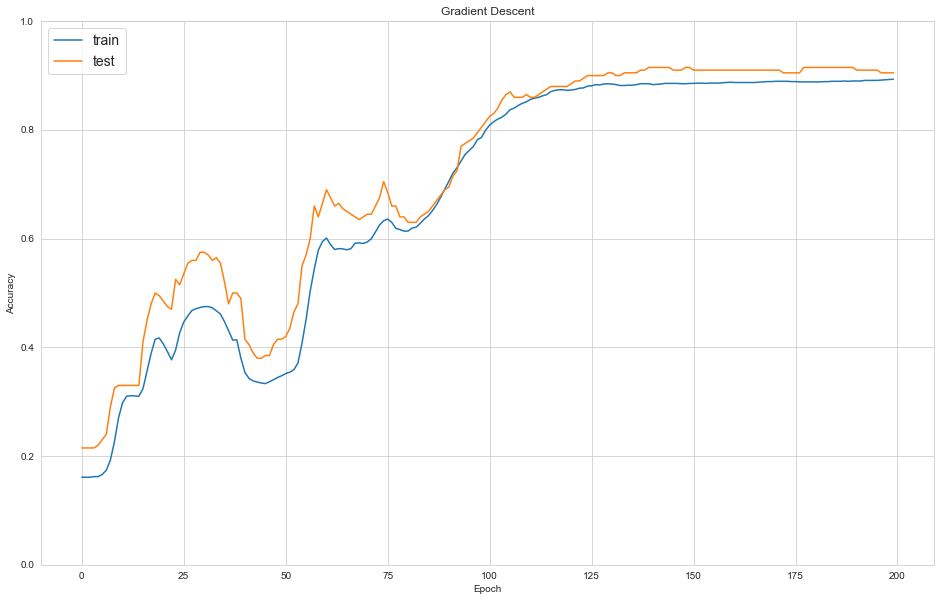

In [10]:
plt.figure(figsize=(16,10))
plt.title("Gradient Descent")
plt.plot(model.history["train_acc"], label="train")
plt.plot(model.history["test_acc"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.ylim(0., 1.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

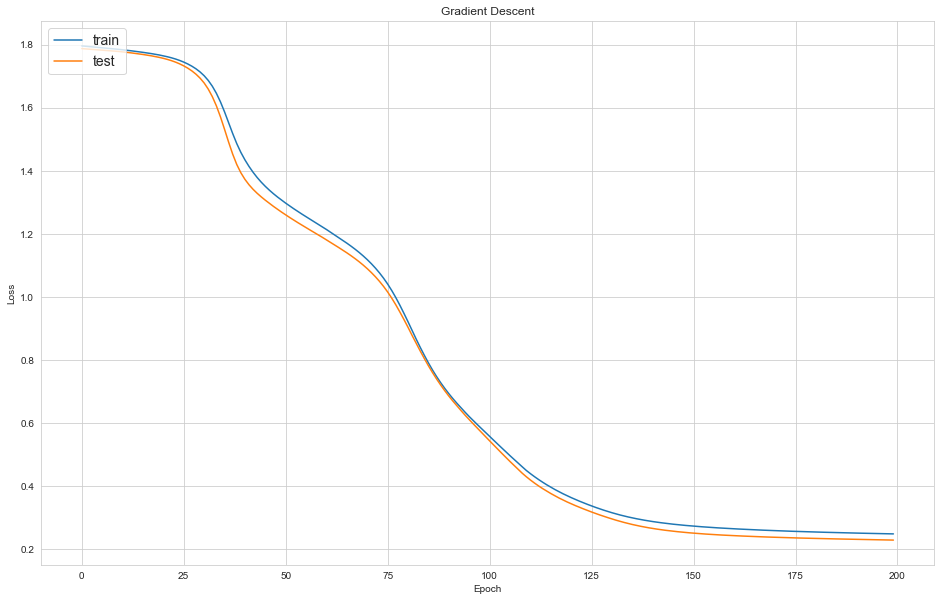

In [11]:
plt.figure(figsize=(16,10))
plt.title("Gradient Descent")
plt.plot(model.history["train_loss"], label="train")
plt.plot(model.history["test_loss"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [12]:
layers = [
    DenseLayer.initialize(units_prev=N_FEATURES, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=N_CLASSES),
    SoftmaxLayer()
]

optimizer = RMSProp(lr=0.005)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [13]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=40
)

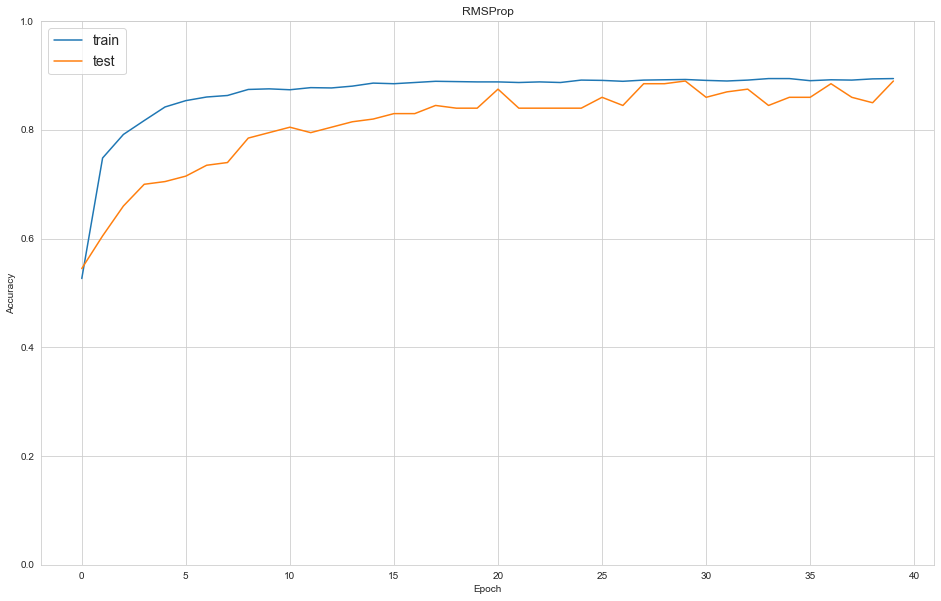

In [14]:
plt.figure(figsize=(16,10))
plt.title("RMSProp")
plt.plot(model.history["train_acc"], label="train")
plt.plot(model.history["test_acc"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.ylim(0., 1.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

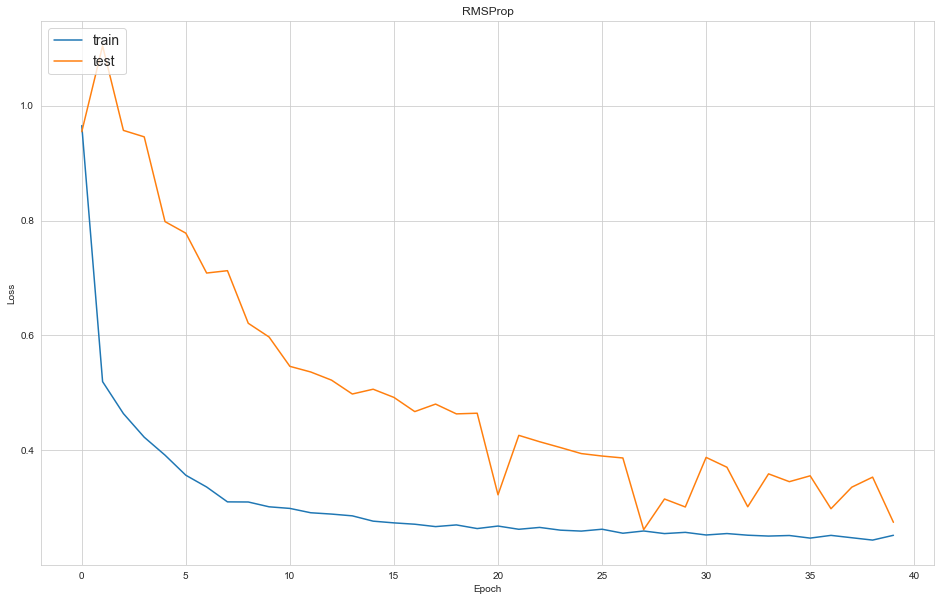

In [15]:
plt.figure(figsize=(16,10))
plt.title("RMSProp")
plt.plot(model.history["train_loss"], label="train")
plt.plot(model.history["test_loss"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [16]:
layers = [
    DenseLayer.initialize(units_prev=N_FEATURES, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=50),
    ReluLayer(),
    DenseLayer.initialize(units_prev=50, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=N_CLASSES),
    SoftmaxLayer()
]

optimizer = Adam(lr=0.005)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [17]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=20
)

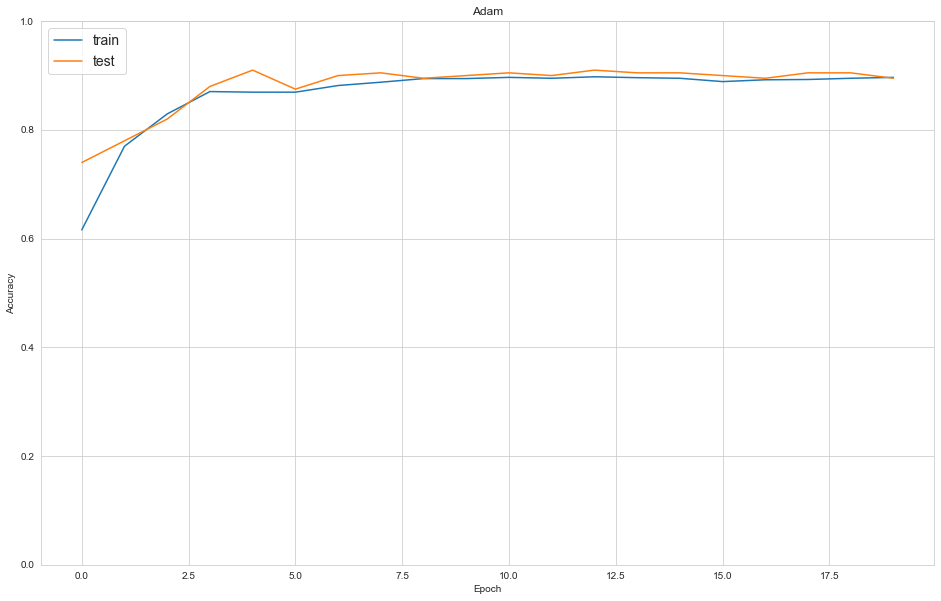

In [18]:
plt.figure(figsize=(16,10))
plt.title("Adam")
plt.plot(model.history["train_acc"], label="train")
plt.plot(model.history["test_acc"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.ylim(0., 1.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

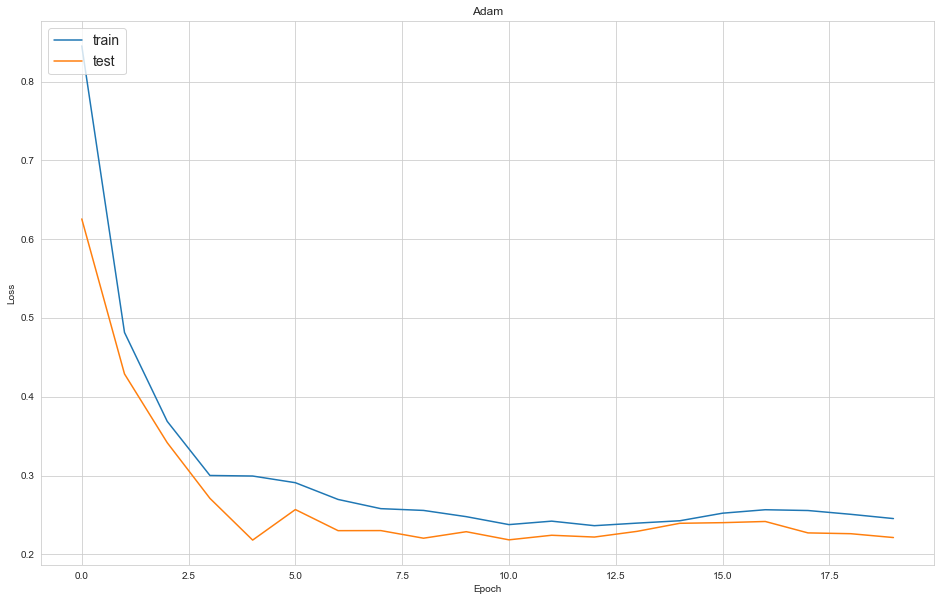

In [19]:
plt.figure(figsize=(16,10))
plt.title("Adam")
plt.plot(model.history["train_loss"], label="train")
plt.plot(model.history["test_loss"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()